FOR CLASSIFICATION

  STEP 1 importing libraries

In [17]:
import numpy as np
import pandas as pd
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

STEP2 LOAD DATASET

In [18]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()

In [19]:
X=data.data
y=data.target
print(X.shape)
print(y.shape)

(569, 30)
(569,)


STEP3 TRAIN TEST SPLIT

In [20]:
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

🔹 Step 4: Feature Scaling

KNN is distance-based → scaling is very important.

In [21]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

🔹 Step 5: Train KNN Classifier

In [22]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

🔹 Step 6: Predictions & Evaluation

In [23]:
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9473684210526315

Confusion Matrix:
 [[40  3]
 [ 3 68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



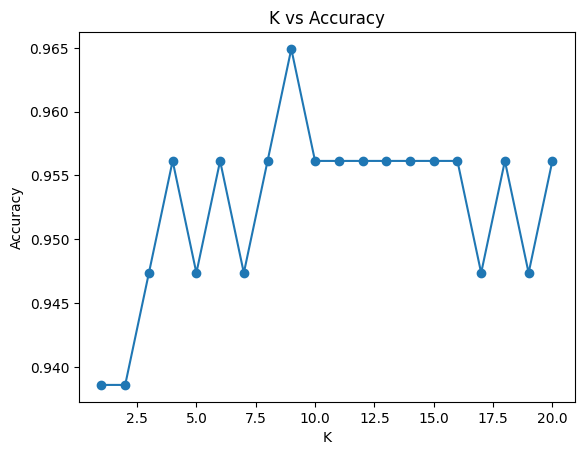

In [24]:
import matplotlib.pyplot as plt

accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, 21), accuracies, marker='o')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.show()


🔹 Decision Boundary for Breast Cancer Dataset with PCA

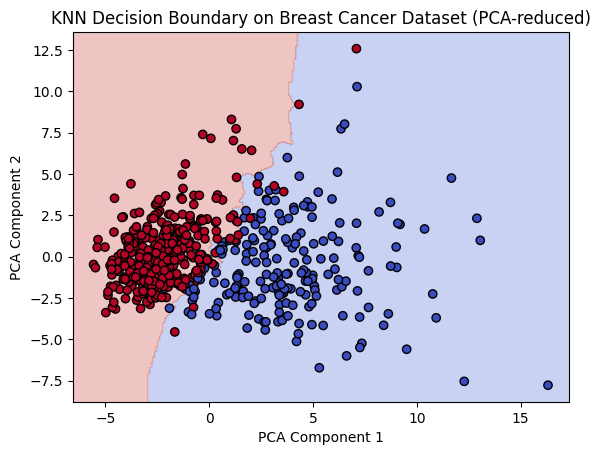

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca, y)

# Create a grid of points
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict for each grid point
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors="k", cmap=plt.cm.coolwarm)
plt.title("KNN Decision Boundary on Breast Cancer Dataset (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


🔹 Plotting KNN Decision Boundary (Classification)

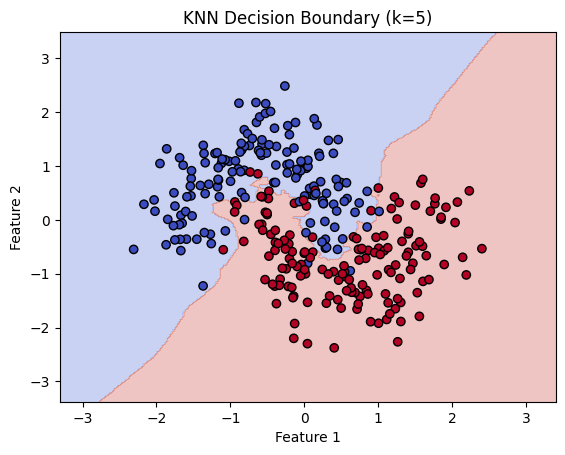

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Generate 2D dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Create a grid of points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict for each point in the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.coolwarm)
plt.title("KNN Decision Boundary (k=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


🔹 KNN Regression with Scikit-learn

Step 1: Import Libraries

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


Step 2: Load a Dataset

Let’s use the California Housing dataset for regression:

In [28]:
from sklearn.datasets import fetch_california_housing

# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (20640, 8)
Target shape: (20640,)


Step 3: Train-Test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


Step 4: Feature Scaling

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Step 5: Train KNN Regressor

In [32]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)


KNeighborsRegressor()

Step 6: Predictions & Evaluation

In [33]:
y_pred = knn_reg.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.4324216146043236
R² Score: 0.6700101862970989


Step 7: Tuning k

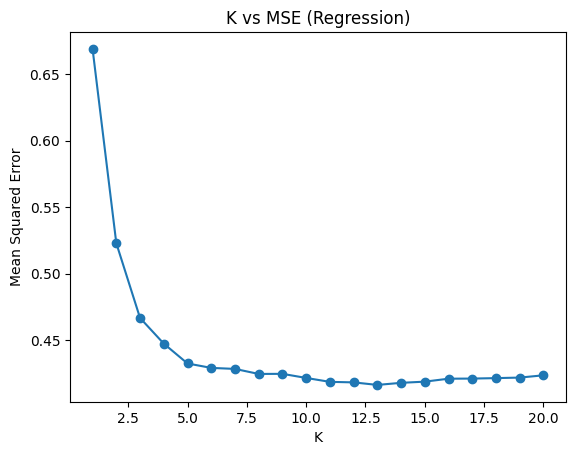

In [34]:
import matplotlib.pyplot as plt

errors = []
for k in range(1, 21):
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    errors.append(mean_squared_error(y_test, y_pred))

plt.plot(range(1, 21), errors, marker='o')
plt.xlabel("K")
plt.ylabel("Mean Squared Error")
plt.title("K vs MSE (Regression)")
plt.show()


📌 Key difference between KNN Classifier & Regressor:

Classifier → majority vote of neighbors.

Regressor → average of neighbors.